In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
data = pd.read_csv("../../data/kgh_2005_beta.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Data        4754 non-null   object 
 1   Otwarcie    4754 non-null   float64
 2   Najwyzszy   4754 non-null   float64
 3   Najnizszy   4754 non-null   float64
 4   Zamkniecie  4754 non-null   float64
 5   Wolumen     4754 non-null   float64
 6   Zwrot       4753 non-null   float64
 7   Beta        4664 non-null   float64
dtypes: float64(7), object(1)
memory usage: 297.3+ KB
None


In [4]:
data['Data'] = pd.to_datetime(data['Data'])
data.dropna(inplace=True)

In [5]:
X = np.arange(len(data)).reshape(-1, 1)
y = data['Beta']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

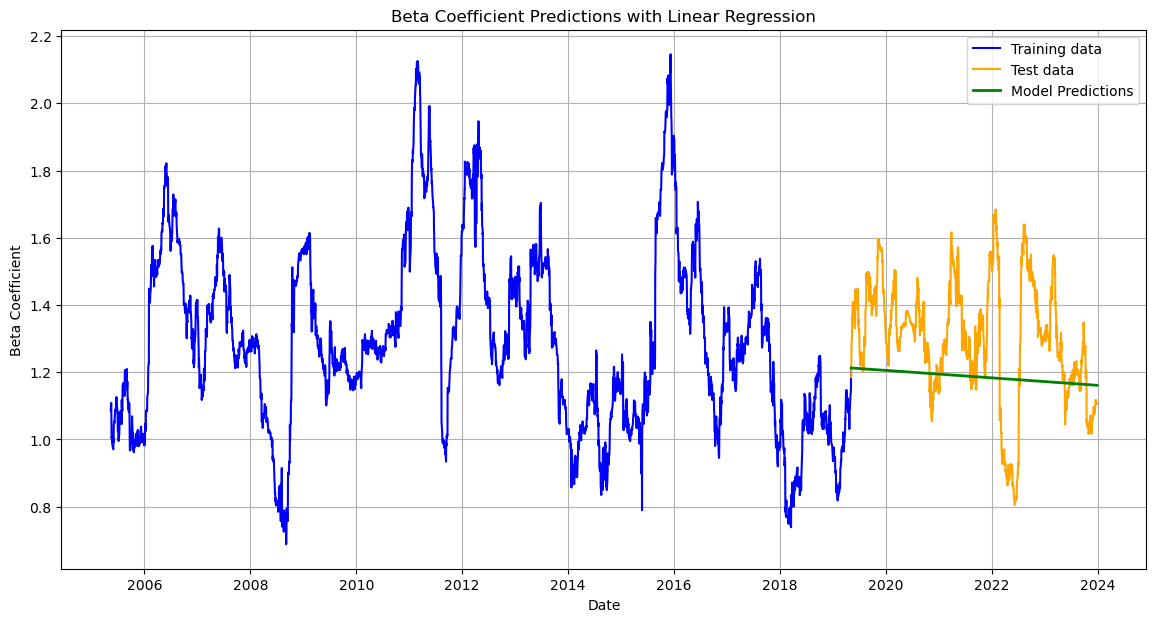

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(data['Data'].iloc[X_train.flatten()], y_train, label='Training data', color='blue')
plt.plot(data['Data'].iloc[X_test.flatten()], y_test, label='Test data', color='orange')
plt.plot(data['Data'].iloc[X_test.flatten()], predictions, label='Model Predictions', color='green', linestyle='-', linewidth=2)
plt.title('Beta Coefficient Predictions with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Beta Coefficient')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print("Średni błąd bezwzględny (MAE):", mae)

Średni błąd bezwzględny (MAE): 0.17010643283030577


In [14]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Pierwiastek błędu średniokwadratowego (RMSE):", rmse)

Pierwiastek błędu średniokwadratowego (RMSE): 0.20707954858753333
